In [ ]:
selected_flag = 2  # Example value, can be set dynamically

if selected_flag == 1:
        str_flag = "Equity"
        print("Portfolio Equity")
elif selected_flag == 2:
        str_flag = "Bond"
        print("Portfolio Bond")
elif selected_flag == 3:
        str_flag = "Commodity"
        print("Portfolio Commodity")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from AnomalyDetectionHelper import AnomalyDetectionEDA

# Configure visualization settings
sns.set_theme(style="whitegrid")
sns.set_context("notebook", font_scale=1.5)

# Dataset Replicating Strategy
path_BC3 = 'Dataset3_PortfolioReplicaStrategyErrataCorrige.xlsx' 

# Dataset Anomaly Detection
path_BC4 = 'Dataset4_EWS.xlsx'

# Load the data from the Excel file
# First sheet contains market data with dates and anomaly labels, second sheet contains metadata
data_df = pd.read_excel(path_BC4, sheet_name='Markets')
metadata_df = pd.read_excel(path_BC4, sheet_name='Metadata')

# Check the structure of the loaded data
print("Data columns:", data_df.columns.tolist())

# Extract date and anomaly label columns
date_col = 'Date' if 'Date' in data_df.columns else data_df.columns[0]
y_col = 'Y' if 'Y' in data_df.columns else None

# Convert dates to datetime format
data_df[date_col] = pd.to_datetime(data_df[date_col], dayfirst=True)  # Date format is dd/mm/yy

# Set date as index
data_df = data_df.set_index(date_col)

# Extract features (all columns except Y if it exists)
if y_col:
    X_df = data_df.drop(y_col, axis=1)
    y = data_df[y_col]
else:
    X_df = data_df
    y = None

# Display basic information about the dataset
print(f"Data shape: {X_df.shape}")
print(f"Total number of records: {len(X_df)}")
print(f"Time period: from {X_df.index.min().strftime('%m/%d/%Y')} to {X_df.index.max().strftime('%m/%d/%Y')}")
print(f"Frequency: {pd.infer_freq(X_df.index) or 'Weekly'}")
print(f"Number of variables: {X_df.shape[1]}")
if y_col:
    print(f"Number of anomalies: {np.sum(y == 1)} ({np.mean(y == 1)*100:.2f}%)")



Data columns: ['Data', 'BDIY', 'CRY', 'Cl1', 'DXY', 'ECSURPUS', 'EMUSTRUU', 'EONIA', 'GBP', 'GT10', 'GTDEM10Y', 'GTDEM2Y', 'GTDEM30Y', 'GTGBP20Y', 'GTGBP2Y', 'GTGBP30Y', 'GTITL10YR', 'GTITL2YR', 'GTITL30YR', 'GTJPY10YR', 'GTJPY2YR', 'GTJPY30YR', 'JPY', 'LF94TRUU', 'LF98TRUU', 'LG30TRUU', 'LMBITR', 'LP01TREU', 'LUACTRUU', 'LUMSTRUU', 'MXBR', 'MXCN', 'MXEU', 'MXIN', 'MXJP', 'MXRU', 'MXUS', 'US0001M', 'USGG2YR', 'USGG30YR', 'USGG3M', 'VIX', 'XAUBGNL', 'Y']
Data shape: (1111, 42)
Total number of records: 1111
Time period: from 01/11/2000 to 04/20/2021
Frequency: W-TUE
Number of variables: 42
Number of anomalies: 237 (21.33%)



Enhanced Metadata:


,Ticker,Description,Mean,Std.Dev,Min,Max,Missing values,Missing (%)
0,BDIY,Baltic Dry Index,2259.860486,2017.811888,291.00000,11793.00000,0,0.00%
1,CRY,TR/CC CRB ER Index,245.247649,68.278081,106.29290,467.57000,0,0.00%
2,Cl1,Generic 1st 'CL' Future,60.708101,25.900813,10.01000,140.97000,0,0.00%
3,DXY,DOLLAR INDEX SPOT,90.934982,11.379095,71.32900,119.82000,0,0.00%
4,ECSURPUS,Bloomberg ECO US Surprise Inde,0.036153,0.349453,-0.97400,0.99100,0,0.00%
5,EMUSTRUU,EM USD Aggregate,704.379495,309.951768,230.52670,1286.35300,0,0.00%
6,EONIA,EMMI EURO OverNight Index Aver,1.363676,1.721894,-0.49800,5.73000,0,0.00%
7,GBP,British Pound Spot,1.569618,0.212340,1.17230,2.08520,0,0.00%
8,GT10,US TREASURY N/B,3.266748,1.332464,0.50800,6.74800,0,0.00%
9,GTDEM10Y,BUNDESREPUB. DEUTSCHLAND,2.448365,1.851558,-0.79400,5.64400,0,0.00%


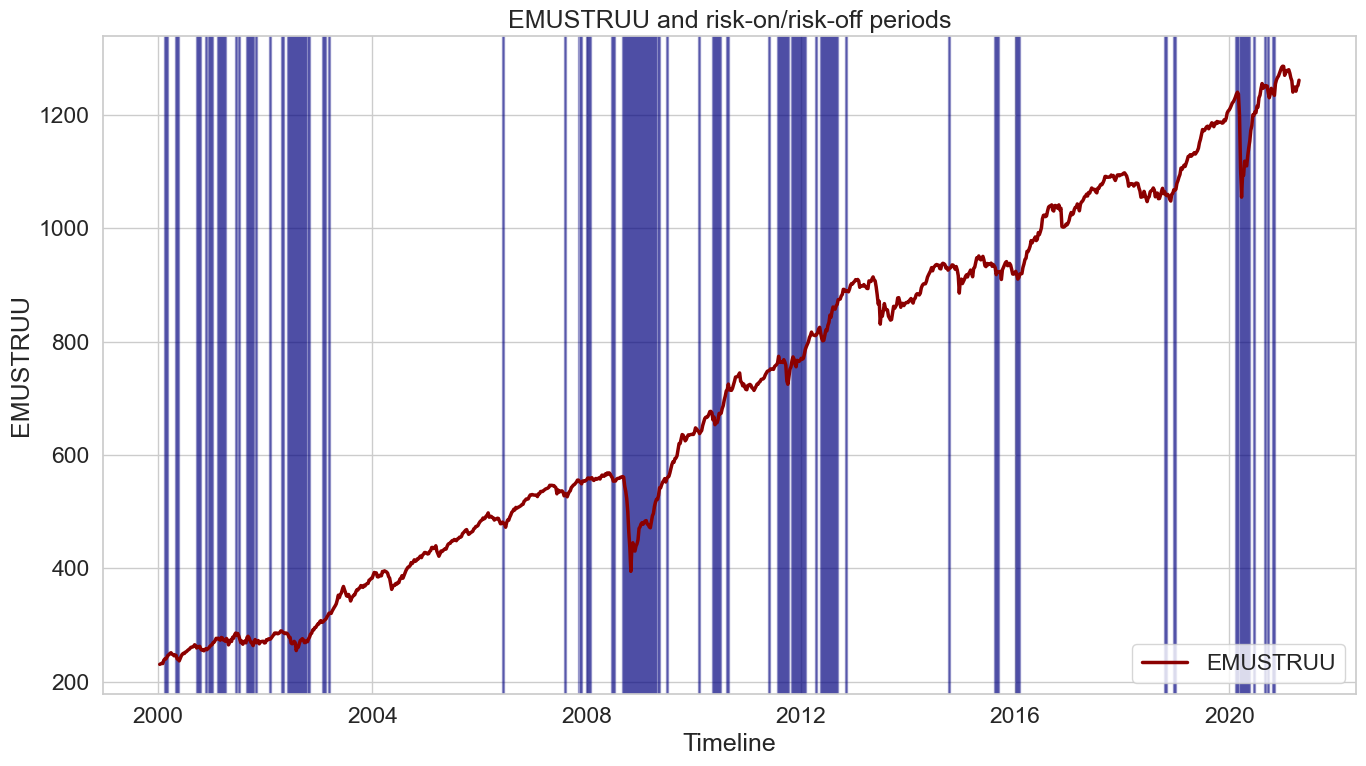

In [2]:
# Initialize the AnomalyDetectionEDA class with the loaded data
eda = AnomalyDetectionEDA(data_df=data_df, metadata_df=metadata_df, X_df=X_df, y=y)

# Generate metadata for the dataset to better understand the features
meta_df = eda.generate_metadata()

# Plot the time series data highlighting anomalies
eda.plot_anomalies(index_col='EMUSTRUU')



### Anomalies Filtering

In this step, we focus on detecting anomalies that are specifically relevant to the assets higly correlated with our portfolio. By selecting only the columns corresponding to our portfolio holdings (`LUMSTRUU`, `LUACTRUU`, and `EMUSTRUU`), we ensure that the anomaly detection process highlights unusual events that could directly impact our investment strategy.
This targeted approach helps us filter out irrelevant anomalies and concentrate on those that matter most for our portfolio management and risk assessment.


In [ ]:
# Select columns based on the selected portfolio type
if selected_flag == 1: # Portfolio Equity 
    cols_to_use = ["MXUS"]

elif selected_flag == 2: # Portfolio Bond
    cols_to_use = ["LUBSTRUU", "LUABSTRUU", "EMUBSTRUU"]

elif selected_flag == 3: # Portfolio Commodity
    cols_to_use = ["MXUS", "LUCSTRUU", "LUACSTRUU", "EMUCSTRUU"]

else:
    raise ValueError("Invalid selected_flag value. Must be 1, 2, or 3.")

# Perform anomaly detection using the specified columns
eda.filter_negative_anomalies(cols_to_use=cols_to_use)


Number of anomalies with negative returns: 165
Total number of anomalies: 237


In [4]:
np.sum(data_df['Y'] == 1) == np.sum(y == 1)

np.True_

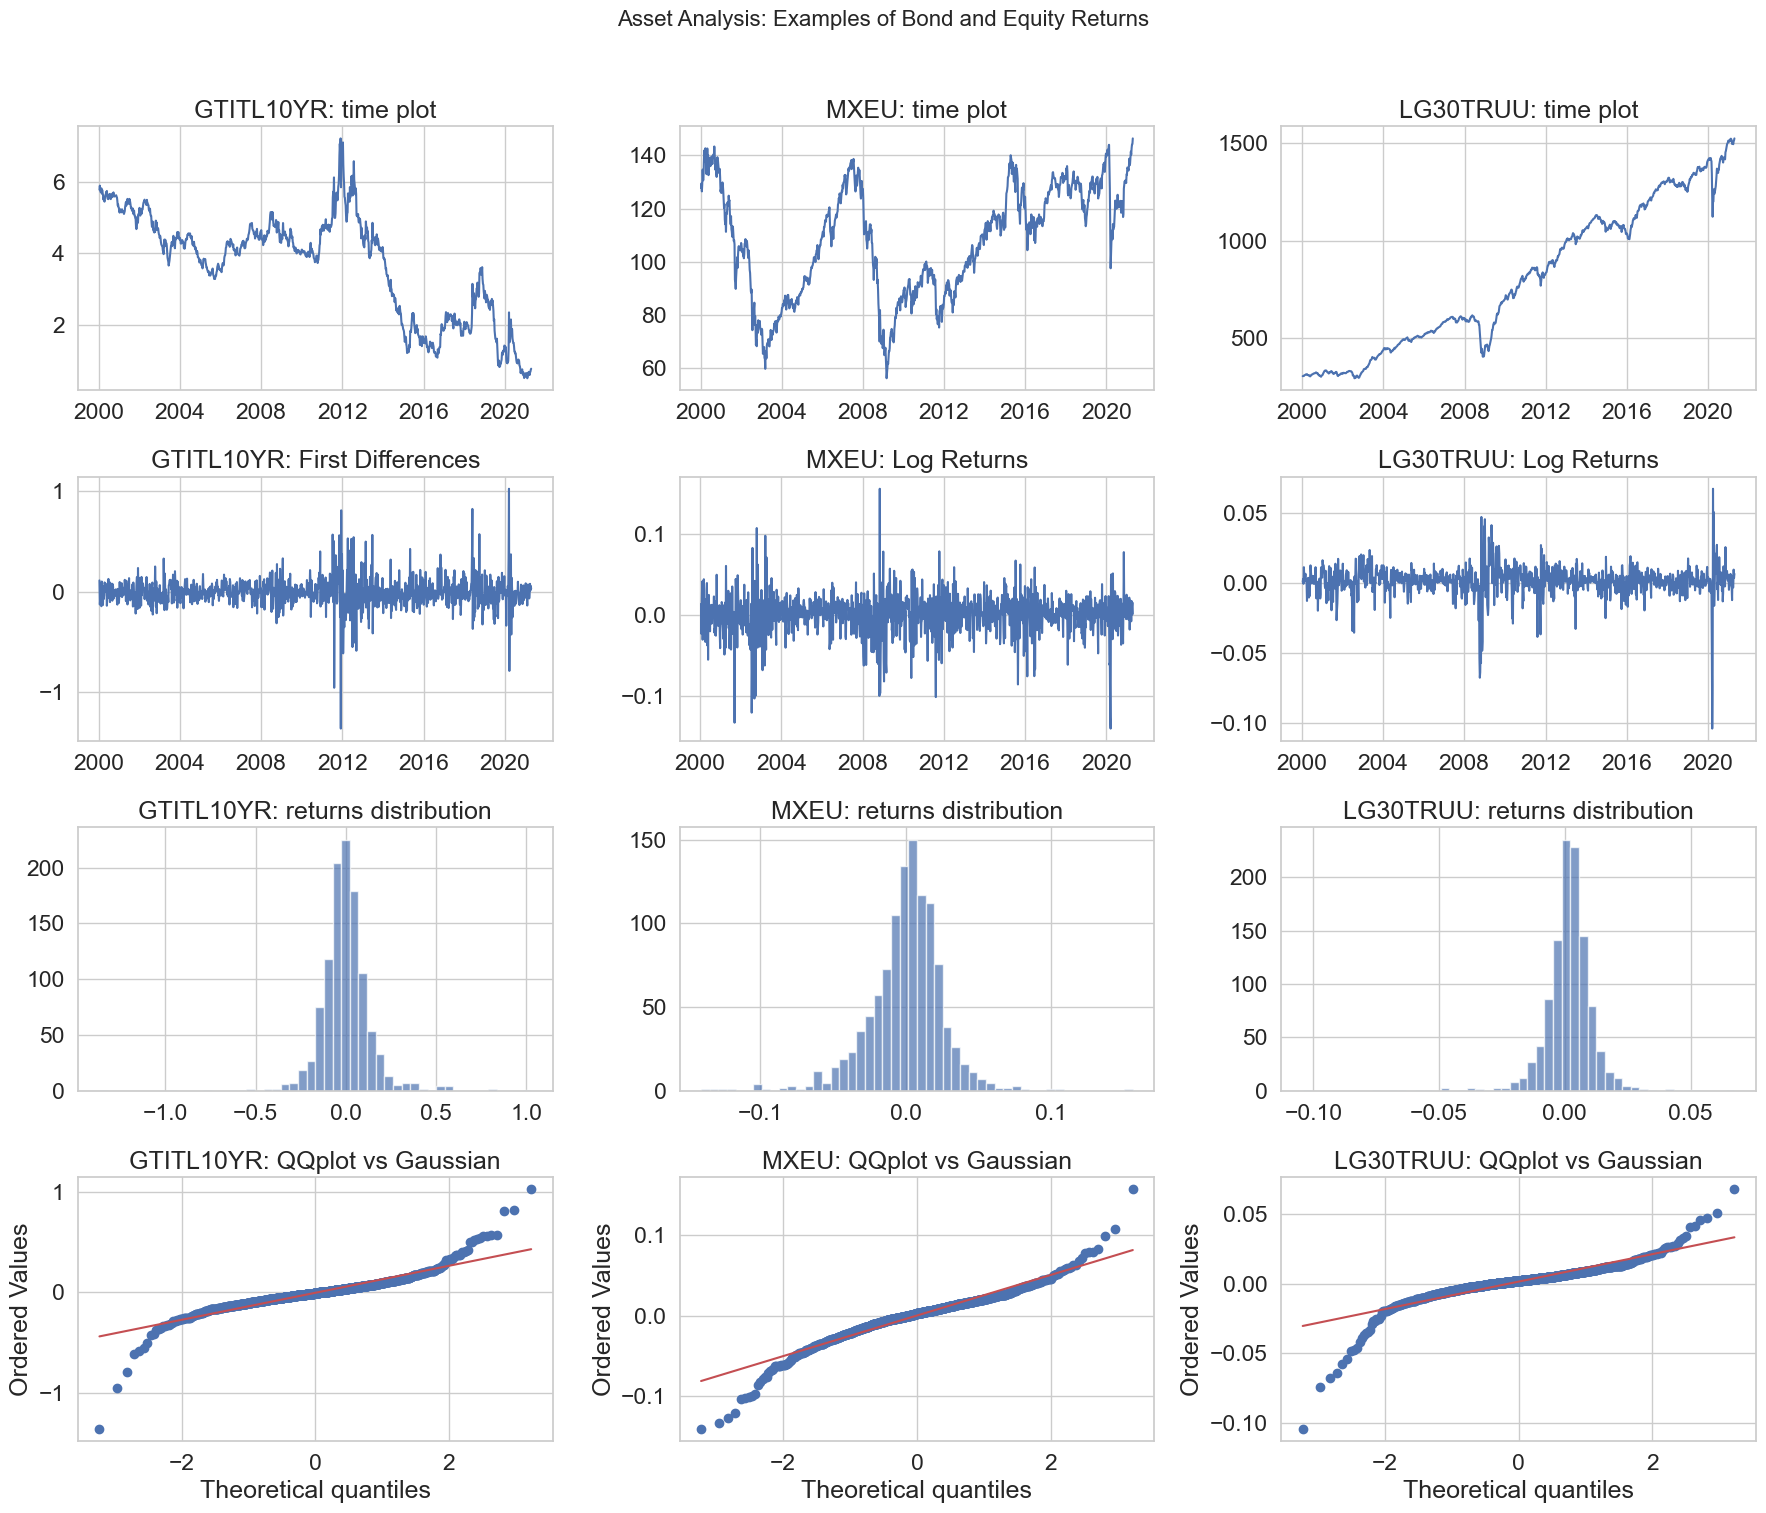

In [5]:
eda.visualize_assets(asset_columns=['GTITL10YR', 'MXEU', 'LG30TRUU'], bonds=['GTITL10YR'])


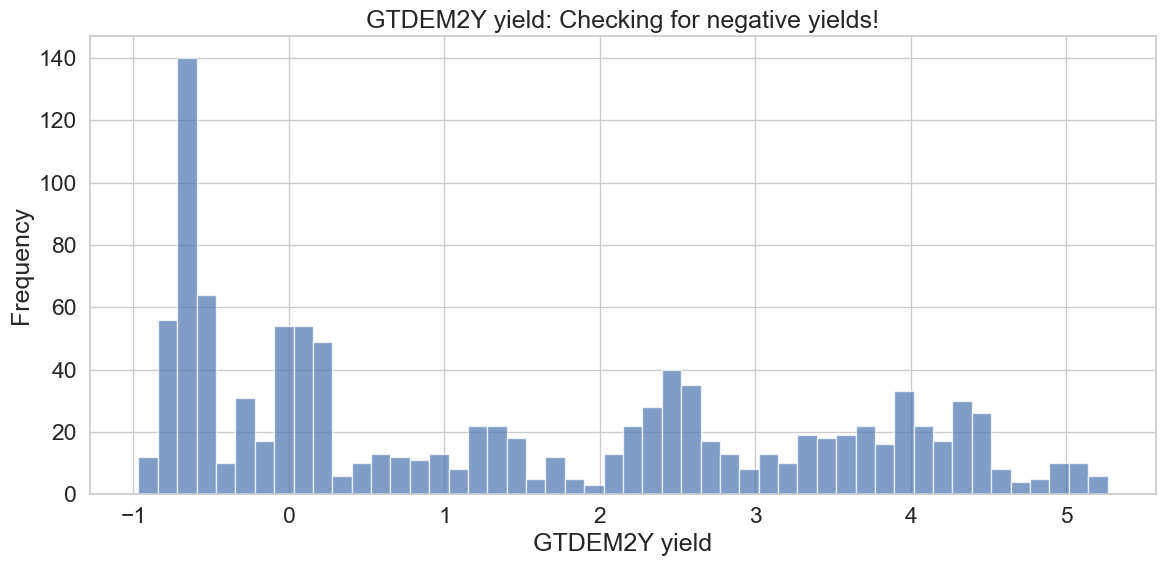

In [6]:
eda.plot_interest_rate_distribution(column='GTDEM2Y')

In [7]:
eda.adf_stationarity_test()

,ADF Statistic,p-value,Used Lag,Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%),Stationary (<0.05 p-value)
ECSURPUS,-6.492,0.0000,7.000000,1103.000000,-3.436293,-2.864164,-2.568167,True
VIX,-3.971,0.0016,11.000000,1099.000000,-3.436314,-2.864173,-2.568172,True
US0001M,-2.945,0.0404,22.000000,1088.000000,-3.436375,-2.864200,-2.568186,True
Cl1,-2.677,0.0781,8.000000,1102.000000,-3.436298,-2.864166,-2.568168,False
USGG3M,-2.660,0.0813,22.000000,1088.000000,-3.436375,-2.864200,-2.568186,False
USGG2YR,-2.523,0.1099,6.000000,1104.000000,-3.436287,-2.864162,-2.568166,False
BDIY,-2.361,0.1530,21.000000,1089.000000,-3.436369,-2.864198,-2.568185,False
CRY,-2.349,0.1566,12.000000,1098.000000,-3.436320,-2.864176,-2.568173,False
GT10,-2.311,0.1684,0.000000,1110.000000,-3.436255,-2.864147,-2.568158,False
MXRU,-2.273,0.1808,3.000000,1107.000000,-3.436271,-2.864154,-2.568162,False


## Evaluate Results Functions

# Anomaly Detection Methods

# 6.1 MLP for Anomaly Detection

## 6.1.1 Simple MLP

In [ ]:
from AnomalyDetectionHelper import AnomalyDataPreparer

# Define cutoff dates for training and validation sets
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')
# Calculate the fractions for training and validation sets based on the cutoff dates
train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()


# Prepare the data using the AnomalyDataPreparer class
preparer_MLP = AnomalyDataPreparer(
    make_stationary=False,
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    train_frac=train_fraction,
    val_frac=val_fraction
)

X_train, y_train, X_val, y_val, X_test, y_test = preparer_MLP.prepare(X_df, y)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, f1_score

# Define the MLP model with a more complex architecture
MLP_basic_model = MLPClassifier(
    hidden_layer_sizes=(512, 256, 128, 64, 32, 16),
    activation='relu',
    solver='adam',
    random_state=42
)

# Train & evaluate
MLP_basic_model.fit(X_train, y_train)

# Choose a threshold on the validation set
Y_val_prob = MLP_basic_model.predict_proba(X_val)[:, 1]
best_f1, best_thresh = -1, 0.5
for τ in np.linspace(0.05, 0.95, 19):
    preds = (Y_val_prob > τ).astype(int)
    f1 = f1_score(y_val, preds)
    if f1 > best_f1:
        best_f1, best_thresh = f1, τ

# # Choose a threshold on the validation set maximizing the precision
# Y_val_prob = MLP_basic_model.predict_proba(X_val)[:, 1]
# best_precision, best_thresh = -1, 0.5
# for τ in np.linspace(0.05, 0.95, 19):
#     preds = (Y_val_prob > τ).astype(int)
#     precision = precision_score(y_val, preds)
#     if precision > best_precision:
#         best_precision, best_thresh = precision, τ

# Evaluate the model on the test set using the best threshold
Y_test_prob_SimpleMLP = MLP_basic_model.predict_proba(X_test)[:,1]
Y_test_pred_SimpleMLP = (Y_test_prob_SimpleMLP > best_thresh).astype(int)


In [ ]:
from AnomalyDetectionHelper import DetectionMethodsEvaluation

# Initialize evaluation class
evaluator_MLP = DetectionMethodsEvaluation(
    preparer=preparer_MLP,
    metadata_df=metadata_df,
    X_df=X_df,
    y=y
)

# Evaluate
print("\n--- MLP (Test) ---")
precision, recall, f1, fin_score = evaluator_MLP.evaluate_model(
    y_true=y_test.values,
    y_pred=Y_test_pred_SimpleMLP,
    y_score=Y_test_prob_SimpleMLP,
    model_name='MLP (Basic)'
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_MLP = pd.Series(Y_test_pred_SimpleMLP, index=y_test.index, name='y_pred')

# Save predictions to CSV
y_test_pred_series_MLP.to_csv(str_flag+'_SimpleMLP_detections.csv', index=True)

## 6.1.2 MLP with Optuna

In [ ]:
from AnomalyDetectionHelper import MLPAnomalyDetector

# Initialize
mlp_detector = MLPAnomalyDetector(input_dim=X_train.shape[1])

# Hyperparameter tuning
study_MLP = mlp_detector.tune_hyperparameters(X_train, y_train, X_val, y_val, n_trials=300, storage="sqlite:///optuna_MLP_" + str_flag + ".db")

# Train final model
mlp_detector.train_final_model(X_train, y_train, X_val, y_val)

# Evaluate on test set
y_pred_MLP_Optuna, y_prob_MLP_Optuna = mlp_detector.evaluate_on_test(X_test, y_test)


In [ ]:
# Evaluate
print("\n--- MLP with Optuna Tuning (Test) ---")
precision, recall, f1, fin_score = evaluator_MLP.evaluate_model(
    y_true=y_test.values,
    y_pred=y_pred_MLP_Optuna,
    y_score=y_prob_MLP_Optuna,
    model_name='MLP (Optuna Tuning)'
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_MLP = pd.Series(y_pred_MLP_Optuna, index=y_test.index, name='y_pred')

# Save predictions to CSV
y_test_pred_series_MLP.to_csv(str_flag+'_OptunaMLP_detections.csv', index=True)

# 6.2 LSTM

## 6.2.1 LSTM Autoencoder

In [ ]:
from AnomalyDetectionHelper import AnomalyDataPreparer, LSTMAEAnomalyDetector, DetectionMethodsEvaluation.evaluate_model

# Put in the test set all the dates before the cutoff date
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()

# Prepare the data using the AnomalyDataPreparer class
preparer_LSTM = AnomalyDataPreparer(
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    chronological_split=True,
    make_stationary=True,
    train_frac=train_fraction,
    val_frac=val_fraction,
    random_state=42
)
X_train, y_train, X_val, y_val, X_test, y_test = preparer_LSTM.prepare(X_df, y)

# Initialize the LSTM Autoencoder anomaly detector
LSTM_detector = LSTMAEAnomalyDetector(input_dim=X_train.shape[1])

# Combine all data for hyperparameter tuning
X_full = np.vstack([X_train.to_numpy(), X_val.to_numpy(), X_test.to_numpy()])
y_full = np.hstack([y_train.to_numpy(), y_val.to_numpy(), y_test.to_numpy()])

# Train the model and tune hyperparameters
study = LSTM_detector.tune_hyperparameters(X_train.to_numpy(), y_train.to_numpy(), X_val.to_numpy(), y_val.to_numpy(), n_trials=10, storage='sqlite:///optuna_LSTM_AE_' + str_flag + '.db')


In [ ]:
# Retrieve best threshold
best_trial = study.best_trial
best_threshold = best_trial.user_attrs["best_threshold"]
print(f"Best threshold from validation tuning: {best_threshold:.6f}")

# Retrain model
X_full_seq, _ = LSTM_detector.create_sequences(X_train.values, seq_length=LSTM_detector.best_params['seq_len'])
LSTM_detector.train_final_model(X_full_seq, input_dim=X_train.shape[1])

# Evaluate on test with best threshold
y_pred_LSTM, test_err_LSTM = LSTM_detector.evaluate_on_test(X_test.values, best_threshold)



In [ ]:
from AnomalyDetectionHelper import DetectionMethodsEvaluation

# Initialize evaluation class
evaluator = DetectionMethodsEvaluation(
    preparer=preparer_LSTM,
    metadata_df=metadata_df,
    X_df=X_df,
    y=y
)

# Evaluate
print("\n--- LSTM Autoencoder (Test) ---")
precision, recall, f1, fin_score = evaluator.evaluate_model(
    y_true=y_test.values,
    y_pred=y_pred_LSTM,
    y_score=test_err_LSTM,
    model_name='LSTM Autoencoder'
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_LSTM = pd.Series(y_pred_LSTM, index=y_test.index, name='y_pred')

# Save predictions to CSV
y_test_pred_series_LSTM.to_csv(str_flag+'_LSTM_AE_predictions.csv', index=True)

## 6.2.2 LSTM Classifier

In [ ]:
from AnomalyDetectionHelper import AnomalyDataPreparer, LSTMClassifierAnomalyDetector

# Define the cutoff dates for train and validation sets
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

# Compute train and validation fractions based on the cutoff dates
train_fraction = (X_df.index < cutoff_date_train).mean()
val_fraction = ((X_df.index < cutoff_date_val) & (X_df.index >= cutoff_date_train)).mean()

# Prepare the data using the AnomalyDataPreparer class
preparer_cls = AnomalyDataPreparer(
    shuffle_data=False,
    scale_data=True,
    do_split=True,
    chronological_split=True,
    make_stationary=True,
    train_frac=train_fraction,
    val_frac=val_fraction,
    random_state=42
)

X_train, y_train, X_val, y_val, X_test, y_test = preparer_cls.prepare(X_df, y)

# Combine all data for hyperparameter tuning
X_full = np.vstack([X_train.values, X_val.values])
y_full = np.hstack([y_train.values, y_val.values])

# Initialize and tune the supervised LSTM
classifier = LSTMClassifierAnomalyDetector(input_dim=X_train.shape[1])
study = classifier.tune_hyperparameters(X_train.values, y_train.values, X_val.values, y_val.values, n_trials=300, storage='sqlite:///optuna_LSTM_classifier_' + str_flag + '.db')

# Train the final model with all data
classifier.train_final_model(X_full, y_full)

# Consider the sequence length for aligning predictions
seq_len = classifier.best_params['seq_len']
y_test_aligned = y_test.values[seq_len - 1:]


#### Trivial Threshold

In [ ]:
from AnomalyDetectionHelper import DetectionMethodsEvaluation

# Prediction on the test set
y_pred_proba_LSTM_cls = classifier.predict(X_test.values)
y_pred_LSTM_cls = (y_pred_proba_LSTM_cls > 0.5).astype(int)

# Initialize evaluation class
evaluator = DetectionMethodsEvaluation(
    preparer=preparer_cls,
    metadata_df=metadata_df,
    X_df=X_df,
    y=y
)

# Evaluate
print("\n--- LSTM Classifier (Test) ---")
precision, recall, f1, fin_score = evaluator.evaluate_model(
    y_true=y_test_aligned,
    y_pred=y_pred_LSTM_cls,
    y_score=y_pred_proba_LSTM_cls,
    model_name='LSTM Classifier'
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_LSTM = pd.Series(y_pred_LSTM_cls, index=y_test.index, name='y_pred')

# Save predictions to CSV
y_test_pred_series_LSTM.to_csv(str_flag+'_LSTM_Cls_predictions.csv', index=True)

#### Tuned Threshold

In [ ]:
from AnomalyDetectionHelper import DetectionMethodsEvaluation
from sklearn.metrics import precision_recall_curve

# Model probabilities
y_pred_proba_LSTM_cls_T = classifier.predict(X_test.values)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_aligned, y_pred_proba_LSTM_cls_T)

# Find the threshold that achieves precision ≥ 0.99
desired_precision = 0.55
best_thresh = None
for p, r, t in zip(precision, recall, thresholds):
    if p >= desired_precision:
        best_thresh = t
        break

# Fallback if no threshold reaches desired precision
if best_thresh is None:
    best_thresh = thresholds[-1]
    print("Warning: No threshold met desired precision; using highest threshold.")

print("Best threshold for desired precision:", best_thresh)

# Final predictions
y_pred_LSTM_cls_T = (y_pred_proba_LSTM_cls_T > best_thresh).astype(int)

# Initialize evaluation class
evaluator = DetectionMethodsEvaluation(
    preparer=preparer_cls,
    metadata_df=metadata_df,
    X_df=X_df,
    y=y
)

# Evaluate
print("\n--- LSTM Classifier with Tuned Threshold (Test) ---")
precision, recall, f1, fin_score = evaluator.evaluate_model(
    y_true=y_test_aligned,
    y_pred=y_pred_LSTM_cls_T,
    y_score=y_pred_proba_LSTM_cls_T,
    model_name='LSTM Classifier with Tuned Threshold'
)

# Convert predictions to a Series with same index as y_test
y_test_pred_series_LSTM = pd.Series(y_pred_LSTM_cls_T, index=y_test.index, name='y_pred')

# Save predictions to CSV
y_test_pred_series_LSTM.to_csv(str_flag+'_LSTM_Cls_T_predictions.csv', index=True)

In [ ]:
import matplotlib.pyplot as plt

# Load data
X_df = pd.read_excel('Dataset4_EWS.xlsx', sheet_name='Markets', parse_dates=['Data'])
X_df.set_index('Data', inplace=True)

# Define cutoff dates and find nearest ones
cutoff_date_train = pd.to_datetime('2012-01-01')
cutoff_date_val = pd.to_datetime('2017-01-01')

# Split the dataset
train_df = X_df[X_df.index < cutoff_date_train]
val_df   = X_df[(X_df.index >= cutoff_date_train) & (X_df.index < cutoff_date_val)]
test_df  = X_df[X_df.index >= cutoff_date_val]

# Split features and targets
features = X_df.columns.drop('Y')
X_train = train_df[features]
y_train = train_df['Y']
X_test  = test_df[features]
y_test  = test_df['Y']
dates   = X_test.index


# Dictionary of all prediction series
prediction_series_dict = {
    "MLP_SIMPLE": Y_test_pred_SimpleMLP,
    "MLP_Optuna": y_test_pred_series_MLP,
    "LSTM":       y_pred_LSTM,
    "LSTM_cls":   y_pred_LSTM_cls,
    "LSTM_cls_T": y_pred_LSTM_cls_T
   
}

# for name, series in prediction_series_dict.items():
prediction_series_dict["LSTM_cls"] = prediction_series_dict["LSTM_cls"].reindex(y_test.index).fillna(0)

# Compute index returns
if selected_flag == 1:  
    # Portfolio Equity
    indices = ['MXUS']
    weights_dict = [0.5, 0.25, 0.25]
elif selected_flag == 2:
    # Portfolio Bond
    indices = ['LUBSTRUU', 'LUABSTRUU', 'EMUBSTRUU']
    weights_dict = [0.2, 0.4, 0.2]
elif selected_flag == 3:
    # Portfolio Commodity
    indices = ['MXUS', 'LUCSTRUU', 'LUACSTRUU', 'EMUCSTRUU']
    weights_dict = [0.8, 0.05, 0.1, 0.05]
else:
    raise ValueError("Invalid selected_flag value. Must be 1, 2, or 3.")

# Calculate returns for the selected indices
returns = X_test[indices].pct_change()

# Initialize portfolio trackers
port_all = [1.0]
port_no_true = [1.0]
prediction_portfolios = {name: [1.0] for name in prediction_series_dict}

# Simulate portfolio evolution
for i in range(1, len(dates)):
    # avg_ret = returns.iloc[i].mean()
    avg_ret = np.sum(returns.iloc[i] * weights_dict)
    
    # All days portfolio
    port_all.append(port_all[-1] * (1 + avg_ret))

    # Exclude true anomalies
    if y_test.iloc[i] == 1:
        port_no_true.append(port_no_true[-1])
    else:
        port_no_true.append(port_no_true[-1] * (1 + avg_ret))

    # Exclude predicted anomalies
    for name, pred_series in prediction_series_dict.items():
        prev_val = prediction_portfolios[name][-1]
        prediction_portfolios[name].append(prev_val if pred_series.iloc[i] == 1 else prev_val * (1 + avg_ret))

# Construct portfolio DataFrame
portfolio_df = pd.DataFrame({
    'All_Days': port_all,
    'No_Anomaly': port_no_true
}, index=dates)

for name, values in prediction_portfolios.items():
    portfolio_df[f'No_{name}'] = values

# Function to compute max drawdown and recovery
def compute_drawdown(series):
    peak = series.expanding().max()
    drawdown = (series - peak) / peak
    mdd = drawdown.min()
    trough_date = drawdown.idxmin()
    peak_val = peak.loc[trough_date]
    post = series.loc[trough_date:]
    recover_idx = post[post >= peak_val].first_valid_index()
    days_recovery = None
    if recover_idx is not None:
        days_recovery = series.index.get_loc(recover_idx) - series.index.get_loc(trough_date)
    return float(mdd), int(days_recovery), trough_date, recover_idx

# Print drawdown info
print(f"All Days: Max DD={compute_drawdown(portfolio_df['All_Days'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['All_Days'])[1]} weeks")
print(f"No True Anoms: Max DD={compute_drawdown(portfolio_df['No_Anomaly'])[0]:.4%}, Recovery={compute_drawdown(portfolio_df['No_Anomaly'])[1]} weeks")

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        mdd, rec, _, _ = compute_drawdown(portfolio_df[col])
        print(f"{col}: Max DD={mdd:.4%}, Recovery={rec} weeks")

# Plot portfolio values
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(portfolio_df['All_Days'], linewidth=2, label='All Days')
ax.plot(portfolio_df['No_Anomaly'], linewidth=2, label='No True Anomalies')

for col in portfolio_df.columns:
    if col.startswith("No_") and col not in ["No_Anomaly"]:
        ax.plot(portfolio_df[col], linewidth=2, label=col.replace("No_", "No Pred "))

ax.set_title('Portfolio Value Over Time', fontsize=26)
ax.set_xlabel('Date', fontsize=24)
ax.set_ylabel('Portfolio Value (Index)', fontsize=24)
ax.legend(fontsize=13, frameon=True)
ax.grid(True, linestyle='--', alpha=0.5)
plt.setp(ax.get_xticklabels(), fontsize=14, rotation=10, ha='right')
plt.setp(ax.get_yticklabels(), fontsize=14)
plt.tight_layout()
plt.show()
